In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import warnings
warnings.simplefilter('ignore')

데이터 로드

In [3]:
df = pd.read_csv('../../data/dataset/202206_202206_연령별인구현황_월간.csv', encoding='cp949',thousands=',')
df.head()

,행정구역,2022년06월_계_총인구수,2022년06월_계_연령구간인구수,2022년06월_계_0~9세,2022년06월_계_10~19세,2022년06월_계_20~29세,2022년06월_계_30~39세,2022년06월_계_40~49세,2022년06월_계_50~59세,2022년06월_계_60~69세,2022년06월_계_70~79세,2022년06월_계_80~89세,2022년06월_계_90~99세,2022년06월_계_100세 이상
0,서울특별시 (1100000000),9494807,9494807,564739,752985,1412722,1430728,1470923,1507380,1290741,710430,309902,42531,1726
1,서울특별시 종로구 (1111000000),143624,143624,6703,10176,22674,19363,20540,24745,20405,11637,6390,951,40
2,서울특별시 종로구 청운효자동(1111051500),11803,11803,696,1135,1501,1538,2072,1905,1405,934,547,67,3
3,서울특별시 종로구 사직동(1111053000),9310,9310,535,664,1168,1472,1436,1543,1204,710,489,88,1
4,서울특별시 종로구 삼청동(1111054000),2386,2386,91,167,294,294,341,370,407,238,153,28,3


### 데이터 탐색

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.describe(include=object)

In [ ]:
df.isnull().sum()

### 데이터 전처리

#### 1. 필요없는 컬럼 제거 - 총인구수, 연령구간인구수 삭제

In [4]:
df = df.drop('2022년06월_계_총인구수',axis=1)
df = df.drop('2022년06월_계_연령구간인구수',axis=1)
df

,행정구역,2022년06월_계_0~9세,2022년06월_계_10~19세,2022년06월_계_20~29세,2022년06월_계_30~39세,2022년06월_계_40~49세,2022년06월_계_50~59세,2022년06월_계_60~69세,2022년06월_계_70~79세,2022년06월_계_80~89세,2022년06월_계_90~99세,2022년06월_계_100세 이상
0,서울특별시 (1100000000),564739,752985,1412722,1430728,1470923,1507380,1290741,710430,309902,42531,1726
1,서울특별시 종로구 (1111000000),6703,10176,22674,19363,20540,24745,20405,11637,6390,951,40
2,서울특별시 종로구 청운효자동(1111051500),696,1135,1501,1538,2072,1905,1405,934,547,67,3
3,서울특별시 종로구 사직동(1111053000),535,664,1168,1472,1436,1543,1204,710,489,88,1
4,서울특별시 종로구 삼청동(1111054000),91,167,294,294,341,370,407,238,153,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3862,제주특별자치도 서귀포시 서홍동(5013058000),1236,1466,1244,1267,2023,1701,1230,716,327,42,2
3863,제주특별자치도 서귀포시 대륜동(5013059000),1550,1393,1427,2172,2775,2420,2017,1062,511,77,7
3864,제주특별자치도 서귀포시 대천동(5013060000),1557,1275,1385,1996,2484,2080,1620,904,430,67,4
3865,제주특별자치도 서귀포시 중문동(5013061000),986,1188,1354,1684,2108,2010,1461,848,509,66,3


In [5]:
df.head(2)

,행정구역,2022년06월_계_0~9세,2022년06월_계_10~19세,2022년06월_계_20~29세,2022년06월_계_30~39세,2022년06월_계_40~49세,2022년06월_계_50~59세,2022년06월_계_60~69세,2022년06월_계_70~79세,2022년06월_계_80~89세,2022년06월_계_90~99세,2022년06월_계_100세 이상
0,서울특별시 (1100000000),564739,752985,1412722,1430728,1470923,1507380,1290741,710430,309902,42531,1726
1,서울특별시 종로구 (1111000000),6703,10176,22674,19363,20540,24745,20405,11637,6390,951,40


#### 2. 컬럼명 변경 - 2022년 06월 계 제거

In [6]:
# df.columns.str.replace('2022년06월_계_','')
for column in df.columns:
    if '2022년06월_계_' in column:
        column1 = column.replace('2022년06월_계_','')
        df.rename(columns={column:column1}, inplace=True)

In [7]:
df.head(2)

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,서울특별시 (1100000000),564739,752985,1412722,1430728,1470923,1507380,1290741,710430,309902,42531,1726
1,서울특별시 종로구 (1111000000),6703,10176,22674,19363,20540,24745,20405,11637,6390,951,40


### 종로구 평창동 인구 구조

#### 1) 종로구 평창동 찾기

In [ ]:
df.iloc[6]

In [ ]:
df[df['행정구역'] == '서울특별시 종로구 평창동(1111056000)']

In [ ]:
df[df['행정구역'].str.contains('평창동')]

#### 행정구역 인덱스 설정

In [55]:
df.set_index('행정구역', inplace=True)

In [9]:
df.head(1)

,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
행정구역,,,,,,,,,,,
서울특별시 (1100000000),564739,752985,1412722,1430728,1470923,1507380,1290741,710430,309902,42531,1726


In [10]:
# 전체 인덱스

df.index

Index(['서울특별시  (1100000000)', '서울특별시 종로구 (1111000000)',
       '서울특별시 종로구 청운효자동(1111051500)', '서울특별시 종로구 사직동(1111053000)',
       '서울특별시 종로구 삼청동(1111054000)', '서울특별시 종로구 부암동(1111055000)',
       '서울특별시 종로구 평창동(1111056000)', '서울특별시 종로구 무악동(1111057000)',
       '서울특별시 종로구 교남동(1111058000)', '서울특별시 종로구 가회동(1111060000)',
       ...
       '제주특별자치도 서귀포시 중앙동(5013053000)', '제주특별자치도 서귀포시 천지동(5013054000)',
       '제주특별자치도 서귀포시 효돈동(5013055000)', '제주특별자치도 서귀포시 영천동(5013056000)',
       '제주특별자치도 서귀포시 동홍동(5013057000)', '제주특별자치도 서귀포시 서홍동(5013058000)',
       '제주특별자치도 서귀포시 대륜동(5013059000)', '제주특별자치도 서귀포시 대천동(5013060000)',
       '제주특별자치도 서귀포시 중문동(5013061000)', '제주특별자치도 서귀포시 예래동(5013062000)'],
      dtype='object', name='행정구역', length=3867)

In [11]:
df[df.index.str.contains('평창동')]

,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
행정구역,,,,,,,,,,,
서울특별시 종로구 평창동(1111056000),1137,1543,2258,2146,2661,3256,2695,1323,785,151,8


#### 행정구역 인덱스 해제

In [12]:
df.reset_index(inplace=True)
df.head(1)

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,서울특별시 (1100000000),564739,752985,1412722,1430728,1470923,1507380,1290741,710430,309902,42531,1726


In [13]:
dong = df[df['행정구역'].str.contains('평창동')]
dong

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
6,서울특별시 종로구 평창동(1111056000),1137,1543,2258,2146,2661,3256,2695,1323,785,151,8


#### 1) 평창동_df 에서 행정구역 컬럼 제거

In [14]:
dong.drop(columns='행정구역',inplace=True)

#### 2) 행/열 변경 : T or transpose()

In [16]:
dong.T

,6
0~9세,1137
10~19세,1543
20~29세,2258
30~39세,2146
40~49세,2661
50~59세,3256
60~69세,2695
70~79세,1323
80~89세,785
90~99세,151


In [17]:
dong.drop(columns='index',inplace=True)

KeyError: "['index'] not found in axis"

In [21]:
dong.T

,인구수
0~9세,1137
10~19세,1543
20~29세,2258
30~39세,2146
40~49세,2661
50~59세,3256
60~69세,2695
70~79세,1323
80~89세,785
90~99세,151


In [23]:
dong = dong.T

In [25]:
dong.T

,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
인구수,1137,1543,2258,2146,2661,3256,2695,1323,785,151,8


#### 3) 컬럼명 변경 : 인구수

In [26]:
dong

,인구수
0~9세,1137
10~19세,1543
20~29세,2258
30~39세,2146
40~49세,2661
50~59세,3256
60~69세,2695
70~79세,1323
80~89세,785
90~99세,151


In [76]:
# 인덱스일 때
dong.rename(index={6:'인구수'},inplace=True)
# 컬럼일 때
dong.rename(column={6:'인구수'},inplace=True)

AttributeError: 'str' object has no attribute 'rename'

#### 4) 선차트

#### - matplotlib

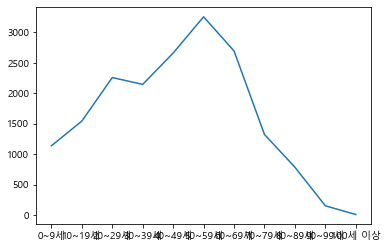

In [28]:
plt.plot(dong['인구수'])

#### - pandas

Text(0.5, 1.0, '평창동 2022년 6월 기준')

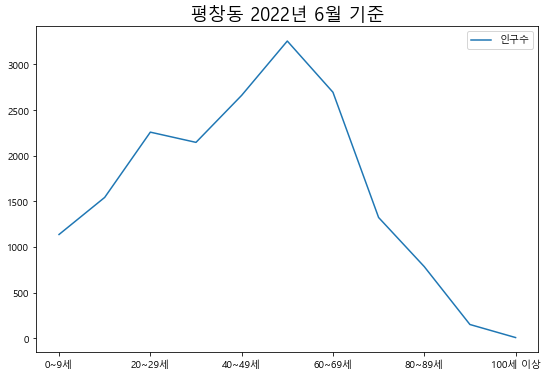

In [37]:
dong.plot(figsize=(9,6))
plt.title('평창동 2022년 6월 기준',fontsize=18)

#### 5) 막대차트

#### - matplotlib

<BarContainer object of 11 artists>

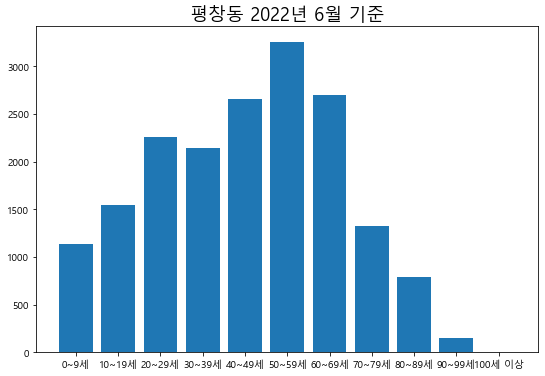

In [33]:
plt.figure(figsize=(9,6))
plt.title('평창동 2022년 6월 기준',fontsize=18)
plt.bar(x=dong.index, height=dong['인구수'])

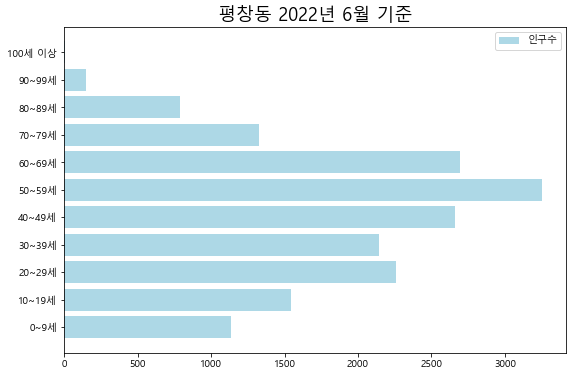

In [39]:
plt.figure(figsize=(9,6))
plt.title('평창동 2022년 6월 기준',fontsize=18)
plt.barh(dong.index,dong['인구수'], color='lightblue',label='인구수')
plt.legend()

#### - pandas

<AxesSubplot:>

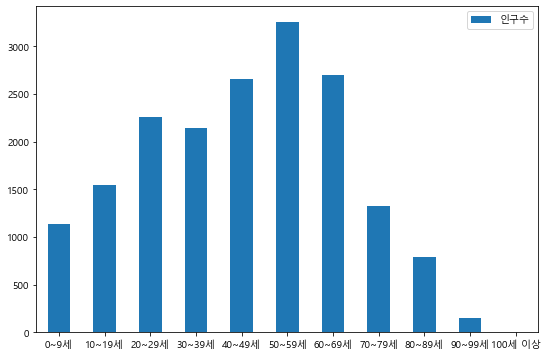

In [43]:
dong.plot.bar(figsize=(9,6),rot=0)

<AxesSubplot:>

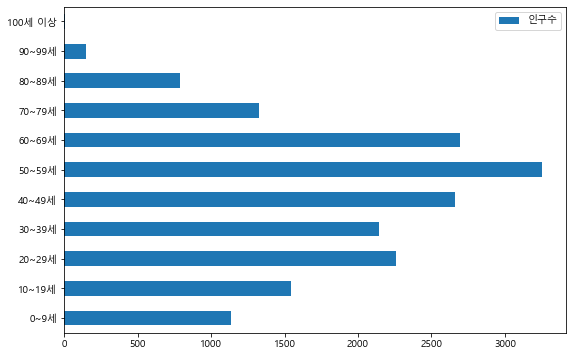

In [44]:
dong.plot.barh(figsize=(9,6),rot=0)

# 우리동네 인구구조 알아보기

### 1) 사용자로부터 동네 입력받기

In [77]:
input_dong = input('인구구조가 궁금한 지역을 입력해 주세요 : ')

인구구조가 궁금한 지역을 입력해 주세요 : 을지로동


#### 2) 사용자가 입력한 동을 찾아 새로운 데이터프레임으로 생성

In [78]:
df.reset_index(inplace=True)

In [79]:
my_dong = df[df['행정구역'].str.contains(input_dong)]
my_dong

,level_0,index,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
26,26,26,서울특별시 중구 을지로동(1114060500),34,39,239,321,183,269,368,190,80,14,0


#### 3) 시각화

In [83]:
# 컬럼을 인덱스로 설정
my_dong.set_index('행정구역',inplace=True)

In [84]:
my_dong

,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
행정구역,,,,,,,,,,,
서울특별시 중구 을지로동(1114060500),34,39,239,321,183,269,368,190,80,14,0


In [85]:
my_dong = my_dong.T

행정구역,서울특별시 중구 을지로동(1114060500)
0~9세,34
10~19세,39
20~29세,239
30~39세,321
40~49세,183
50~59세,269
60~69세,368
70~79세,190
80~89세,80
90~99세,14


In [105]:
my_dong

행정구역,인구수
0~9세,34
10~19세,39
20~29세,239
30~39세,321
40~49세,183
50~59세,269
60~69세,368
70~79세,190
80~89세,80
90~99세,14


In [108]:
# 컬럼명 변경

my_dong.rename(columns={"서울특별시 중구 을지로동(1114060500)":'인구수'},inplace=True)
my_dong['인구수']

0~9세        34
10~19세      39
20~29세     239
30~39세     321
40~49세     183
50~59세     269
60~69세     368
70~79세     190
80~89세      80
90~99세      14
100세 이상      0
Name: 인구수, dtype: int64

#### pandas 로 했으니까 뒤에 x,y축을 주지 않아도 된다.

#### plt로 해준다면 x,y축을 줘야한다 : plt.bar(my_dong.index, my_dong['인구수']

<AxesSubplot:title={'center':'2022년 6월 을지로동 나이별 인구 수'}>

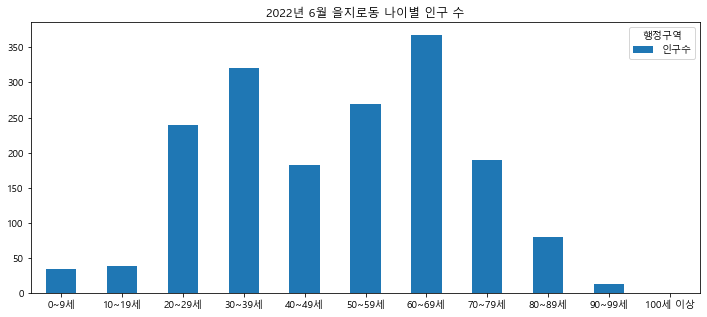

In [111]:
my_dong.plot.bar(title='2022년 6월 ' + input_dong +' 나이별 인구 수', figsize=(12,5),rot=0)

#### 원차트


In [112]:
my_dong

행정구역,인구수
0~9세,34
10~19세,39
20~29세,239
30~39세,321
40~49세,183
50~59세,269
60~69세,368
70~79세,190
80~89세,80
90~99세,14


#### matplotlib

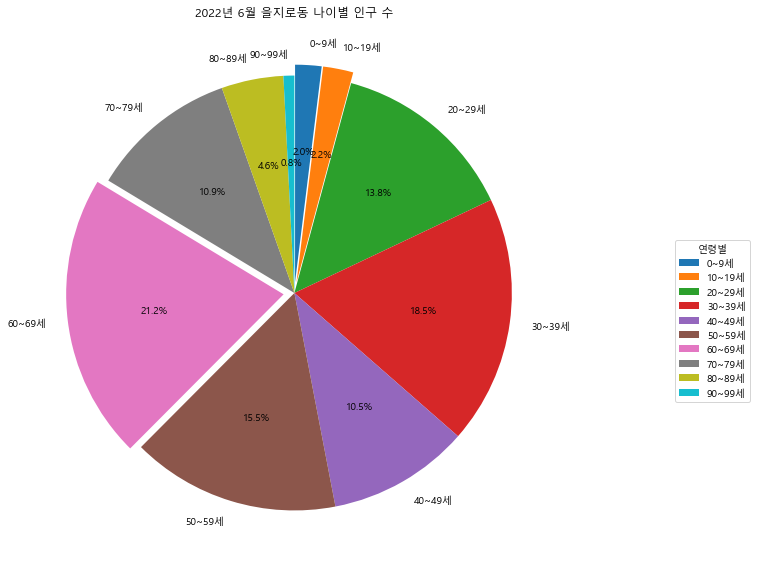

In [142]:
# index.to_list()[:-1] 맨뒤에 리스트 빼기
plt.figure(figsize=(15,10))
values = my_dong['인구수']
labels = my_dong.index
# plt.pie(values, labels=labels,autopct='%.1f%%')

wegdeprops = {'width':0.8,'edgecolor':'w','linewidth':5}
explode = [0.05, 0.05, 0, 0, 0, 0, 0.05, 0, 0, 0]

plt.pie(x = my_dong.iloc[0:10,0], labels = my_dong.index.to_list()[:-1], 
        autopct='%.1f%%', explode=explode, startangle=90, counterclock=False)
plt.title('2022년 6월 '+input_dong+' 나이별 인구 수')
plt.legend(loc=(1.2,0.3), title='연령별')

plt.show()

#### pandas

array([<AxesSubplot:ylabel='인구수'>], dtype=object)

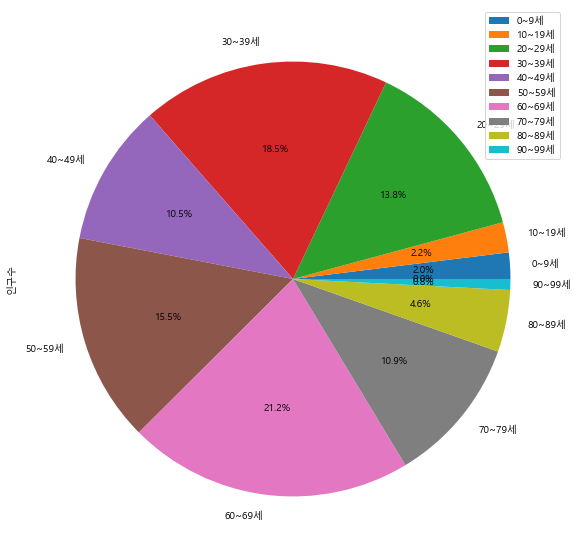

In [131]:
my_dong.plot.pie(subplots=True,autopct='%.1f%%', figsize=(15,10))